<a href="https://colab.research.google.com/github/JulietAmor/Bike-Share/blob/main/Decision_Tree_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# load the California Housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['Price'] = california.target

#Investigate the first few rows
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [6]:
# Check for missing values
print(data.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [7]:
print(data.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

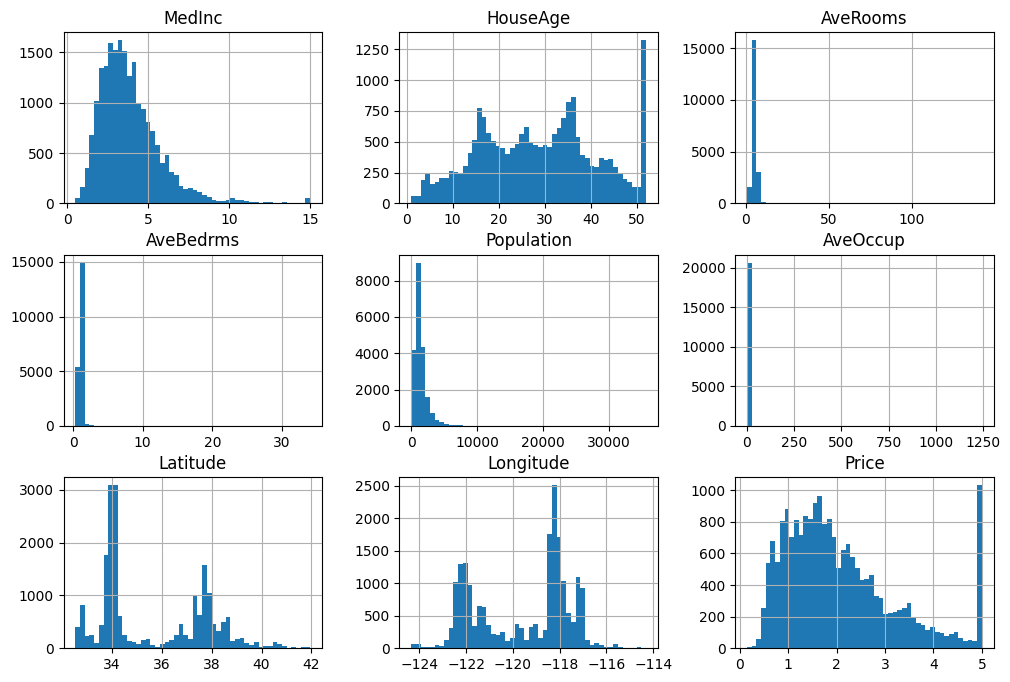

In [9]:
import matplotlib.pyplot as plt

data.hist(bins=50,figsize=(12,8))
plt.show()


array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='MedInc', ylabel='Price'>,
        <Axes: xlabel='AveRooms', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='MedInc'>,
        <Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>],
       [<Axes: xlabel='Price', ylabel='AveRooms'>,
        <Axes: xlabel='MedInc', ylabel='AveRooms'>,
        <Axes: xlabel='AveRooms', ylabel='AveRooms'>]], dtype=object)

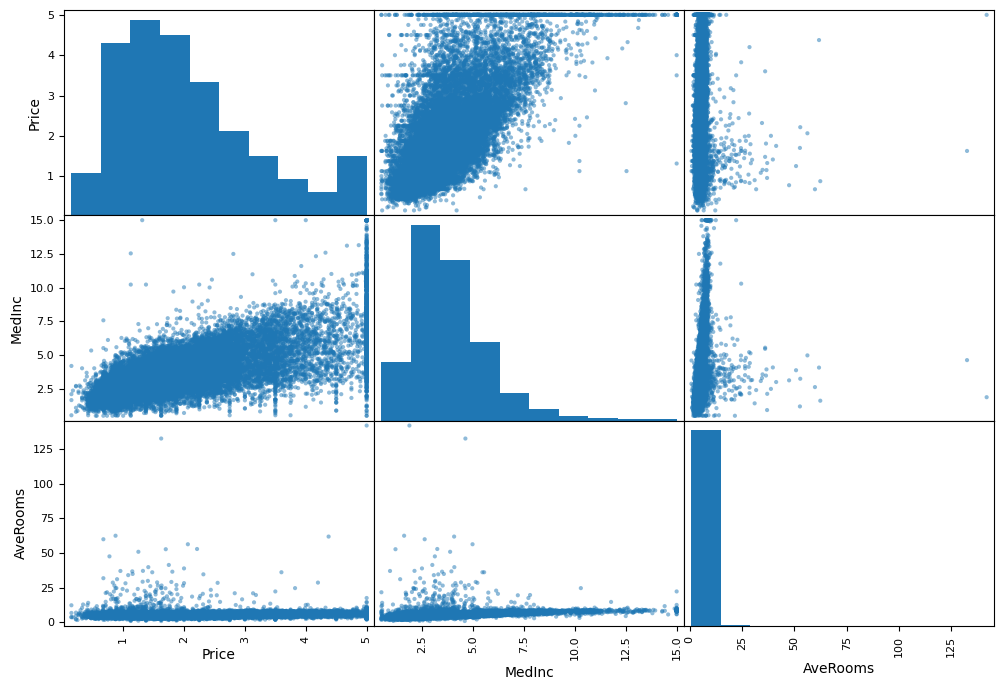

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "MedInc", "AveRooms"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [13]:
corr_matrix = data.corr()
print(corr_matrix["Price"].sort_values(ascending=False))

Price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price, dtype: float64


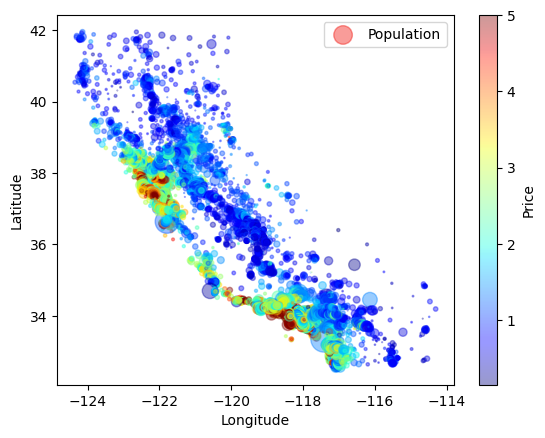

In [19]:
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
          s=data["Population"]/100, label="Population",
          c="Price", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

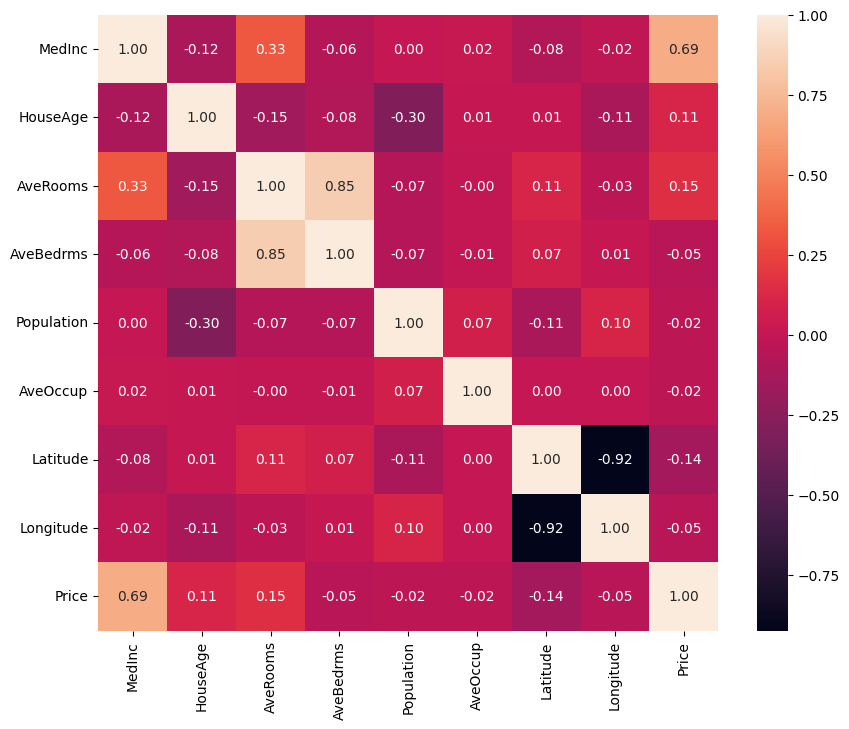

In [20]:
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

#Separate fetures and target
X = data.drop(columns=['Price'])
y = data['Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Initialize the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

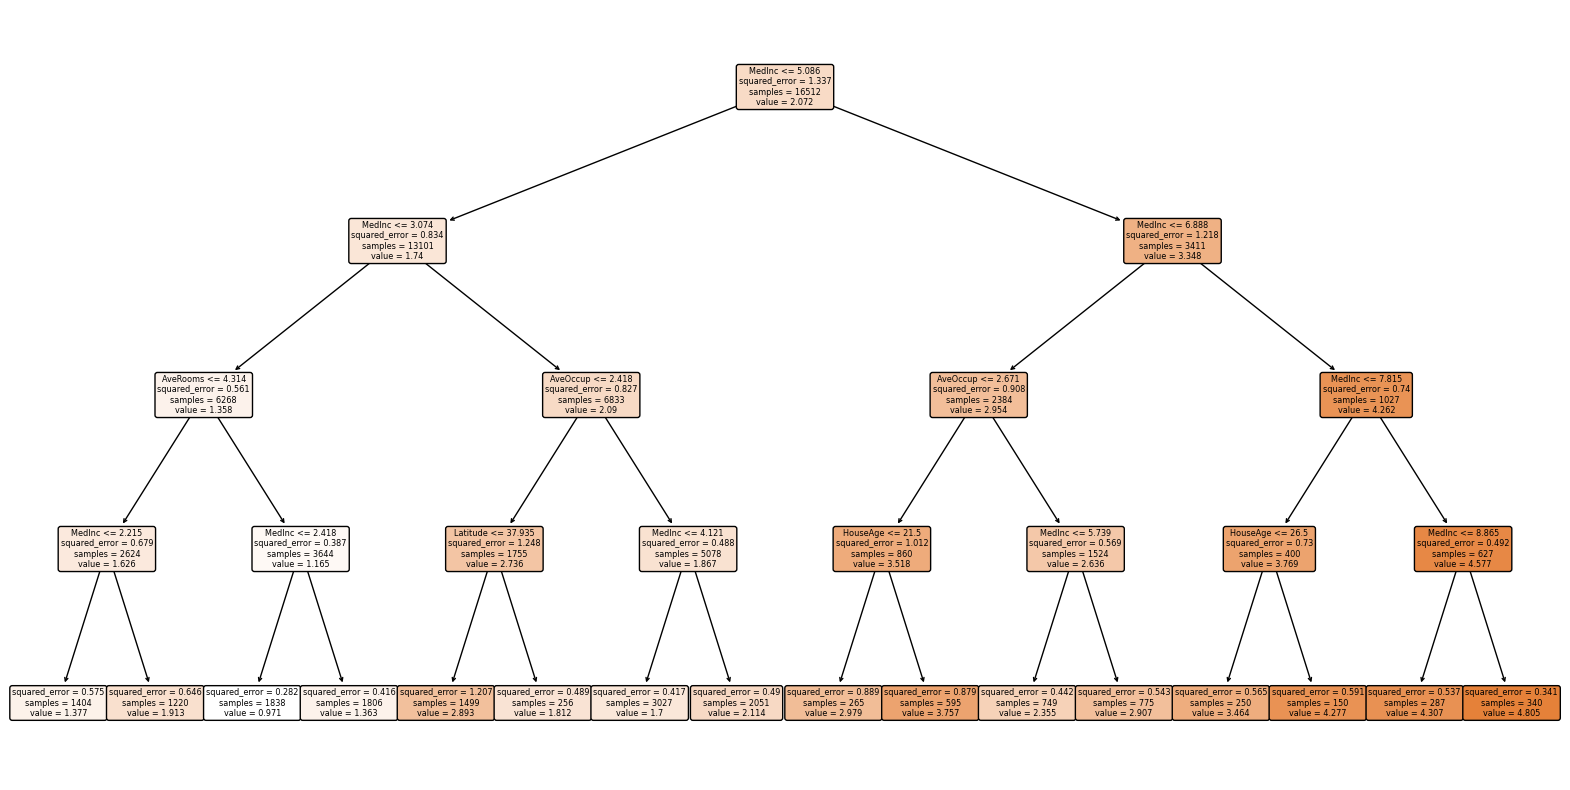

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_reg, feature_names=california.feature_names, rounded=True, filled=True)
plt.show()

In [30]:
!pip install dtreeviz

In [ ]:
from dtreeviz.trees import dtreeviz

viz